# COGS 108 - Final Project 

# Overview

I compared Yelp ratings of restaurants to their health inspection score and created a model to see if Yelp ratings can predict the score a restaurant would get if they were to be inspected. The results were <fill in later>

# Name & GitHub

- Name: Kevin Dong
- GitHub Username: kdong775

# Research Question

Is a restaurant's Yelp review ratings online indicative of its health inspection score?

## Background and Prior Work

Based on the federal website for health inspections in the United States titled “Understanding Food Establishment Inspections”, federal food inspection agencies separate many establishments into different categories: restaurants, bakeries, catering services, etc are considered different establishments. They are also further divided by risk categories ranging from 5 to 1, with a 5 being high risk and a 1 being low risk. The risk is typically correlated to how much raw ingredients an established is expected to handle. Then routine unannounced inspections are given based on the risk category of an establishment. During the inspection, restaurants will be rated on their handling of health hazards, risk factors, equipment are assessed. Important topics such as sanitation and minimum required temperature are also all recorded and checked. Any violation will be written down and the establishment will be given an opportunity to fix their violations, with the amount of time given varying based on the severity of the violation.
 
Despite food inspection being routine work and having hundreds of thousands of restaurants being reviewed yearly, there are still many cases of outbreaks, food poisoning, and illness that come from poorly prepared food.
 
From Carmen Nobel’s article, “A Simple Way for Restaurant Inspectors to Increase Food Safety”, research has shown that 48 million Americans still get sick, 128,000 have to go to the hospital, and 3,000 die from food related illnesses. This means that despite the meticulous work that health inspectors are doing right now, there are still issues that they cannot prevent or violations that they cannot catch.
 
From Maria R. Ibanez’s and Michael W. Toffel’s article, “To Improve Food Inspections, Change the Way They’re Scheduled”, they have found that health inspectors do carry biases as they do their job. Since they are only human, it has been shown that health inspectors are more likely to pass a restaurant that clearly has faults the more restaurants they have already inspected. This comes from the fatigue that builds up as they go along their workday. In other words, the restaurants that are reviewed first are generally given accurate reviews whereas those reviewed later on in the day are given higher reviews than they should generally have. This is an issue because it exposes everyone who goes to those restaurants that have been reviewed later to foodborne illnesses.
 
Prior research has been done by Jun Seok Kang, Yejin Choi, Polina Kuznetsova, and Michael Luca on using text analysis on reviews to judge a restaurant’s health rating. They wanted to see if online reviews on restaurants without a health inspection grade can predict their grades. They scraped various reviews on Yelp from over a span of 7 years from 2006 to 2013. They found out that a restaurant’s grade is accurately reflected by reviews if they removed biased factors such as hired reviewers. In addition, key points of grading such as hygiene, service, and description of foods often give clues as to whether a review will be positive or negative. Overall they concluded that scraping reviews is a viable method of scoping out a restaurant’s grade.

References (include links):
- 1) Ibanez, Maria R., and Michael W. Toffel. “To Improve Food Inspections, Change the Way They're Scheduled.” Harvard Business Review, 16 May 2019, hbr.org/2019/05/to-improve-food-inspections-change-the-way-theyre-scheduled.
- 2) Kang, Jun Seok, et al. “Using Text Analysis to Target Government Inspections: Evidence from Restaurant Hygiene Inspections and Online Reviews.” Semantic Scholar, Elseviewer, 13 July 2013, www.semanticscholar.org/paper/Using-Text-Analysis-to-Target-Government-Evidence-Kang-Kuznetsova/9d9e2d6b1c1d2265d6d8e95e8f6f0cc64258fe9f#references.
- 3) Nobel, Carmen. “A Simple Way for Restaurant Inspectors to Improve Food Safety.” HBS Working Knowledge, Harvard Business School, 9 May 2018, hbswk.hbs.edu/item/a-simple-way-for-restaurant-inspectors-to-improve-food-safety.
- 4) “Understanding Food Establishment Inspections.” Understanding Food Establishment Inspections, DC Health, dchealth.dc.gov/service/understanding-food-establishment-inspections.

# Hypothesis


I do not believe that there is a correlation between a restaurant's average rating online and its health inspection score. Thus I do not believe predictions based on ratings would not be accurate either. I believe so because the average person would not know all the specifics behind what goes on in a health inspection -- little details that we may not mind may be huge health code violations. I trust that a professional's judgment is better than the crowd's in this case.

Null hypothesis: a restaurant's Yelp rating will not be indicative of its health inspection score
Alternative hypothesis: a restaurant's Yelp rating will be indicative of its health inspection score

# Dataset(s)

- Dataset Name: yelp.csv
- Link to the dataset: on Canvas
- Number of observations: 3688 observations, 31 features
This dataset contains Yelp reviews about various restaurants. The dataset gives important information such as the name of the restaurant, the rating, the number of ratings, the pricing, location, and any type of foods the restuarant serves.

- Dataset Name: inspections.csv
- Link to the dataset: on Canvas
- Number of observations: 18466 observations, 36 features
This dataset contains dates of when inspections occurred, by whom, to whom, and the score received. Information such as the type of error, and the severity are included but will not be used for my analysis.


I plan on combining these datasets by linking the restaurant names to their Yelp review ratings. Then I will compare their ratings with their inspection scores. 

# Setup

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()
sns.set_context('talk')

import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest
import warnings
warnings.filterwarnings('ignore')

# Data Cleaning

Describe your data cleaning steps here.

I begin by loading all datasets and then removing columns that are unnecessary for my analysis.

In [2]:
# Convert the proper files into dataframes 
yelp_df = pd.read_csv("yelp.csv")
inspections_df = pd.read_csv("inspections.csv")

In [3]:
# Make the datasets more manageable by keeping only information necessary for use

# Keep only the ID, name, rating, review count, and zip code cols in yelp.csv
yelp_df = yelp_df[["name", "rating", "review_count"]]

# Keep only hsisid, name, state, and postalcode, and score
inspections_df = inspections_df[["name", "score"]]

# Drop any rows that have N/A values
yelp_df.dropna(inplace=True, subset=['name','rating', 'review_count'])
inspections_df.dropna(inplace=True, subset=['name', 'score'])

We can see here that the number of restaurants that have Yelp reviews and have had an inspection is less than the total number of restaurants. Since it is critical that a restaurant has Yelp reviews to correlate with a health inspection score, I drop all restaurants that do not have Yelp reviews.

In [4]:
# Grab all unique values to keep track of number of restaurants
num_unique_yelp_restaurants = len(yelp_df["name"].unique())
print("Restaurants on Yelp:", num_unique_yelp_restaurants)

num_unique_inspection_restaurants = len(inspections_df["name"].unique())
print("Total unique inspections:", num_unique_inspection_restaurants)

# Only restaurants with Yelp reviews will be considered for data analysis
unique_restaurants = yelp_df["name"].unique()

Restaurants on Yelp: 2619
Total unique inspections: 2908


Since certain restaurants are chains and have location numbers and or store numbers associated with them, I get rid of the number by substringing the names up until the '#' symbol. In addition I convert all letters to lowercase and strip all white space.

In [5]:
# Convert all restaurant names to lowercase and strip white spaces so mismatching does not occur
# Stop string at # because some restaurant/chains label their stores with #s
def cleanUp(restaurant):
    if (restaurant.count('#')>1):
        restaurant = restaurant[0:restaurant.find('#')]
    restaurant = restaurant.lower()
    restaurant = restaurant.strip()
    return restaurant

# Run through all the data with cleanUp
yelp_df['name'] = yelp_df['name'].apply(cleanUp)
inspections_df['name'] = inspections_df['name'].apply(cleanUp)

Here I get rid of observations from the inspections dataframe that do not show up on the yelp dataframe by comparing the restaurant names and creating a new column called "hasYelp". If a row's "hasYelp" value is 'False' then I know to drop it because it does not have a corresponding Yelp rating. 

In [6]:
# Find restaurants that do not have Yelp reviews and get rid of them
trueFalse = []
# method to find if an inspected restaurant has Yelp reviews
def populateHasYelp(string):
    flag = False
    for i in unique_restaurants:
        if (i == string):
            flag = True
    trueFalse.append(flag)
    
# apply the method
inspections_df['name'].apply(populateHasYelp)
# insert col into dataframe to help weed out unnecessary rows
inspections_df.insert(2, "hasYelp", trueFalse)
inspections_df = inspections_df[inspections_df.hasYelp != False]

Conversely, Yelp restaurants that do not have an inspection cannot be used. Those must also be rid of.

In [7]:
# Find restaurants that do not have inspection scores and get rid of them
unique_inspection_restaurants = inspections_df["name"].unique()
trueFalse2 = []
# method to find if an inspected restaurant has Yelp reviews
def populateWasInspected(string):
    flag = False
    for i in unique_inspection_restaurants:
        if (i == string):
            flag = True
    trueFalse2.append(flag)
    
# apply the method
yelp_df['name'].apply(populateWasInspected)
# insert col into dataframe to help weed out unnecessary rows
yelp_df.insert(2, "wasInspected", trueFalse2)
yelp_df = yelp_df[yelp_df.wasInspected != False]

Since some restaurants show up multiple times across both the Yelp and inspections dataframe, I decide to average values across all instances of those restaurants. In addition, I multiply the Yelp rating by a factor of 20 to make it easier to compare to the health inspection score since Yelp goes from a scale of 1 to 5, whereas health scores go from a scale of 0 to 100.

In [8]:
# Since some restaurants have multiple inspections, I will average their scores
unique_inspection_restaurants = inspections_df["name"].unique()
num_unique_inspection_restaurants = len(inspections_df["name"].unique())

unique_yelp_restaurants = yelp_df['name'].unique()
num_unique_yelp_restaurants = len(yelp_df['name'].unique())

# Multiple Yelp ratings by a factor of 20
def modify(rating):
    return rating*20

yelp_df['rating'] = yelp_df['rating'].apply(modify)

# Reset the indices for easier manipulation
inspections_df.reset_index(drop=True, inplace=True)
yelp_df.reset_index(drop=True, inplace=True)

print("Total inspected restaurants with Yelp:", num_unique_inspection_restaurants)
print("Total Yelp restaurants with inspections:", num_unique_yelp_restaurants)

Total inspected restaurants with Yelp: 500
Total Yelp restaurants with inspections: 500


I create key:value pairs to stores the averages of each unique restaurant. I then obtain their keys for later use.

In [9]:
# Create key:value pairs for all restaurants
avgYelpRatings = dict()
avgInspectionScores = dict()

for i in unique_yelp_restaurants:
    avgYelpRatings.setdefault(i, 0)
    
for i in unique_inspection_restaurants:
    avgInspectionScores.setdefault(i, 0)
    
inspectionKeys = avgInspectionScores.keys()
yelpKeys = avgYelpRatings.keys()

Here I create arrays out of the inspected restaurants' and Yelp restaurant's names and score/rating so that I can easily create a merge final dataset.

In [10]:
inspectionRestaurantNames = inspections_df['name'].values
inspectionRestaurantScores = inspections_df['score'].to_numpy()
inspectionRestaurantScores = inspectionRestaurantScores.astype(int)

yelpRestaurantNames = yelp_df['name'].values
yelpRestaurantRating = yelp_df['rating'].to_numpy()
yelpRestaurantRating = yelpRestaurantRating.astype(int)

matchScoretoRating = [0] * 500

I begin calculating the averages for each restaurant by matching its name and grabbing any duplicate scores it may have. Then it is divided by the total of duplicates to get the mean. This final value is then stored away for analysis later.

In [11]:
# This loop gets the average inspection scores for all restaurants
for i in inspectionRestaurantNames:
    # variable for storage in a separate array since we are using a string loop
    counter = 0
    # variable used for mean calculation
    dupeCount = 0
    total = 0
    for j in inspectionKeys:
        if (i == j):
            dupeCount = dupeCount + 1
            total = (total + inspectionRestaurantScores[counter])/dupeCount
            avgInspectionScores.update({j:total})
        counter = counter + 1
        
# This loop gets the average yelp scores for all restaurants
for i in yelpRestaurantNames:
    # variable for storage in a separate array since we are using a string loop
    counter = 0
    # variable used for mean calculation
    dupeCount = 0
    total = 0
    for j in yelpKeys:
        if (i == j):
            dupeCount = dupeCount + 1
            total = (total + yelpRestaurantRating[counter])/dupeCount
            avgYelpRatings.update({j:total})
        counter = counter + 1

# This loop matches up a restaurant's average Yelp rating with their average inspection score
for i in inspectionRestaurantNames:
    counter = 0
    for j in yelpKeys:
        if (i == j):
            matchScoretoRating[counter] = avgInspectionScores.get(i)
        counter = counter + 1


Here I merge to get my final working dataset.

In [12]:
merged_df = pd.DataFrame(list(avgYelpRatings.items()),columns = ['RestaurantName','AvgRating'])
merged_df.insert(2, 'AvgScore', matchScoretoRating)
print(merged_df)

                  RestaurantName  AvgRating  AvgScore
0                         subway       70.0      96.0
1                      bojangles       70.0      98.0
2    san jose mexican restaurant       70.0      95.0
3                      la cocina       90.0      95.0
4                     desi mazaa       70.0      98.0
..                           ...        ...       ...
495              kaplan catering       80.0      98.0
496          taqueria la esquina       80.0      98.0
497       elmcroft of northridge       90.0      93.0
498               aj's food mart       80.0      94.0
499             highgrove estate       70.0      98.0

[500 rows x 3 columns]


# Data Analysis & Results

Include cells that describe the steps in your data analysis.

I make sure that the amount of unique restaurants in both yelp_df and inspections_df match the match of observations I got after merging. Since they are all 500, I know that I've successfully wrangled out unusable data from usable data and have condensed the usable data that was repeated--namely restaurants that have multiple ratings under the same name or restaurants that have gotten multiple citations.

In [13]:
print(len(yelp_df['name'].unique()))
print(len(inspections_df['name'].unique()))

500
500


Here I look at the test statistics and p-values of healthScores and yelpRatings to see if they are normally distributed. Based on the data, it seems that it may not be so.

In [14]:
st_scores, p_scores = stats.normaltest(merged_df['AvgScore'].values)
st_ratings, p_ratings = stats.normaltest(merged_df['AvgRating'].values)
print(st_scores)
print(p_scores)
print(st_ratings)
print(p_ratings)

37.91772993696051
5.838073536110983e-09
48.49439578880971
2.9483277008014627e-11


Here I visualize the average Yelp review ratings. It appears to have a nice range of values, though there is a gap between the 50 and 60 mark. This means that from the data I've gotten, no review was at the 2.5 range since I've transformed the data by multiplying by a factor of 20.

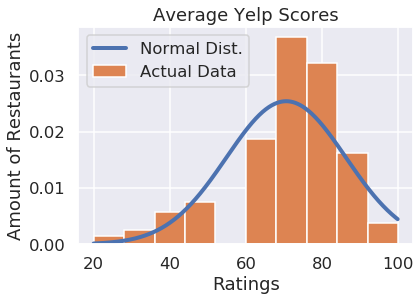

In [15]:
# Test/show Yelp distribution
yelpRatings = merged_df['AvgRating'].values
min_yelp_rating = merged_df['AvgRating'].min()
max_yelp_rating = merged_df['AvgRating'].max()

xs = np.arange(min_yelp_rating, max_yelp_rating, 0.1)
fit = stats.norm.pdf(xs, np.mean(yelpRatings), np.std(yelpRatings))
plt.plot(xs, fit, label = 'Normal Dist.', lw = 4)
plt.hist(yelpRatings, density = True, label = 'Actual Data')
plt.title("Average Yelp Scores")
plt.xlabel("Ratings")
plt.ylabel("Amount of Restaurants")
plt.legend()
f1 = plt.gcf()

Here I visualize the health scores. Based on what I see, it appears to slightly skewed to the right, with many scores averaging around at 95. There is also a poor range, where few, if at all, values go below 85.

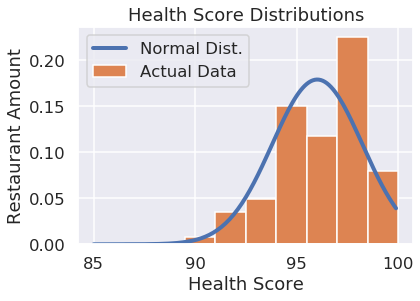

In [16]:
# Test/show Health Inspection Score distribution
healthScores = merged_df['AvgScore'].values
min_health_score = merged_df['AvgScore'].min()
max_health_score = merged_df['AvgScore'].max()

xy = np.arange(min_health_score, max_health_score, 0.1)
fit = stats.norm.pdf(xy, np.mean(healthScores), np.std(healthScores))
plt.plot(xy, fit, label = 'Normal Dist.', lw = 4)
plt.hist(healthScores, density = True, label = 'Actual Data')
plt.title("Health Score Distributions")
plt.xlabel("Health Score")
plt.ylabel("Restaurant Amount")
plt.legend()
f2 = plt.gcf()

Here I check the averages of the health scores and yelp ratings. From what I see, there is large disparity between the averages. This further support my hypothesis that yelp reviews cannot be used to predict health inspection scores.

In [17]:
avg_health_score = merged_df['AvgScore'].mean()
avg_yelp_rating = merged_df['AvgRating'].mean()
print(avg_health_score)
print(avg_yelp_rating)

96.02
70.6


Here I perform a t-test on the Yelp ratings and health scores. The negative t-value indicate that the two values are not positively correlated, and the positive p-value indicates that the null hypothesis is more likely to be true.

In [18]:
t_val, p_val = stats.ttest_ind(yelpRatings, healthScores)
print(t_val)
print(p_val)

-35.78534431863888
4.146544914866993e-181


Here I create a pivot plot based to try to predict average health inspection scores from average yelp ratings.

In [19]:
pv = pd.pivot_table(merged_df, values='AvgScore', index = ['RestaurantName','AvgRating'])
pv

,,AvgScore
RestaurantName,AvgRating,
1250 heritage,50.0,95.0
18 seaboard,60.0,96.0
214 martin street,70.0,95.0
42nd st oyster bar,80.0,99.0
a'nets katch,40.0,94.0
...,...,...
yum yum thai cuisine,70.0,98.0
yuri japanese restaurant,70.0,96.0
zayka indian cuisine,70.0,98.0


Based on the extremely insignificant AvgRating coef shown in the OLS model, it further supports the null hypothesis where Yelp ratings cannot be used to predict health inspection scores.

In [20]:
outcome, predictors = patsy.dmatrices('AvgScore ~ AvgRating', merged_df)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               AvgScore   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.1409
Date:                Wed, 10 Jun 2020   Prob (F-statistic):              0.708
Time:                        23:34:37   Log-Likelihood:                -1109.3
No. Observations:                 500   AIC:                             2223.
Df Residuals:                     498   BIC:                             2231.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     95.8518      0.459    208.839      0.0

Here I plot both average scores and average ratings to see the differences between a restaurant's average Yelp rating and its average health inspection score. From what I can see, many restaurant's average inspection scores then to hover around 80-90, creating a consistent line. On the other hand, average Yelp reviews have a bigger range of values, creating what look to be chaos across the visualization.

Text(0.5, 1.0, 'Average Yelp Rating vs Health Inspection Score')

<Figure size 720x576 with 0 Axes>

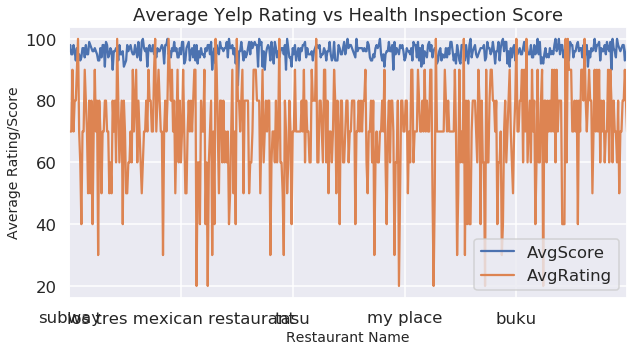

In [21]:
# Merge the Yelp and Inspections dataframes so that the dataframe can be used for analysis

plt.figure(figsize=(10, 8))
merged_df.plot(x='RestaurantName', y=['AvgScore', 'AvgRating'], figsize=(10,5))
plt.ylabel("Average Rating/Score", size=14)
plt.xlabel("Restaurant Name", size=14)
plt.title("Average Yelp Rating vs Health Inspection Score", size=18)

From the above data, I can conclude that the null hypothesis was correct and that a restaurant's average health inspection score is not correlated to its online Yelp review ratings.

# Ethics & Privacy

The Question:
I personally do not know enough information about this topic, so I pulled research from experts about why food inspectors are giving the grades they give and to see if anyone has done a project on a similar question. I found that four students from Harvard Business School had the same question and did prior research and will try to incorporate their findings in my own data gathering and analysis. As they have done something similar, I believe that my questions are answerable.

The Data:
	The data used for this project were all provided by Professor Ellis, who uploaded the files onto Canvas. Specifically I used yelp.csv and inspections.csv. Inside those files, I used the "names" and "rating" columns from yelp.csv, and the "names" and "score" columns from inspections.csv.

Informed Consent:
	Since all of this data is from public domain, there are no consent issues. Regardless, I chose to not use any identifying information aside from restaurant name.

The Implications/Unintended Consequences:
    The analysis implies that many restaurants are actually up to code despite low Yelp ratings. That is not to say that people shouldn't be careful when eating out, but it means that they can trust those who run restaurants more. After all, they're professionals who have passed inspections. 
    However my analysis only covered 500 restaurants so there are many more unknowns out there. I don't people to be getting food poisoning after blindly going to restaurant that may have had many bad reviews about food hygiene, but hasn't gotten their routine inspection yet.

Privacy:
	No one is at risk of losing their privacy because the reviews are aggregated as an average, leaving no names behind. In addition, personal identifying factors such as name and phone number were scrubbed when I cleaned the data.

Evaluation Analysis:
	I will deem the evaluation as a success no matter the outcome since there are only two: yes, online reviews can be used in place of actual inspections; or no, online reviews cannot replace in person inspections. In both cases, valuable information about restaurant health grades and their customers will be used to better understand the need for health inspections.

Transparency and Appeal:
    I only really used two of the features within both datasets: the names and the ratings/scores. I found out that what I wanted to do with my data was largely similar to what we did in A5, so I used those steps as a guideline for what my project would look like.
    If anyone were to follow those steps again, they would probably end up with similar results to what I got. If the datasets do end up changing, then simply running these steps may change the final verdict.

Continuous Monitoring:
    As this is a weekend project, I have no placed much effort into thinking about continuous monitoring of the results. I only hope that the datasets I've used will be updated over time and that I will update my own findings to match their updates.

# Conclusion & Discussion

Clear Conclusion:
The null hypothesis was proven true. Yelp review ratings cannot accurately predict or determine a restaurant's health inspection score. This is due to the fact that Yelp ratings tend to flucuate whereas health inspection scores tend to be similar to one another. This means that ratings are either too loose or the health inspections are too forgiving (i.e. a customer decides to leave a bad rating for fun or an inspector is feeling lenient).

Limitations of Analysis:
Naturally, as these were provided datasets it did not contain everything I wanted, such as specific reviews that could be textually analyzed, but that is a reality of data science. In addition, much of the dataset was confined to one location, the state of North Carolina, so the analysis may have only pertained to that geographical area. Moreover, both datasets contained many more features than the two features I analyzed. I've only scratched the surface of what could be done with these datasets. Lastly, I am not educated on the specifics of health inspections and can only base the results off of what I read when I did background research -- my opinion may not be as accurate or strong as an expert's or professional's.